# Exploration of the 19769 event file

## I. Lineup retrieval

In [1]:
import json

In [2]:
with open('C:\\Users\\marwane\\Documents\\Data Science\\events_19769.json',encoding="utf-8") as data:
    events = json.load(data)

In [3]:
len(events)

3185

In [4]:
import pprint

In [5]:
#pprint.pprint(events[0])

In [6]:
for i,val in enumerate(events):
    pprint.pprint(events[i])

{'duration': 0.0,
 'id': '7d8090f7-bb92-46db-aedd-759176241d98',
 'index': 1,
 'minute': 0,
 'period': 1,
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'possession': 1,
 'possession_team': {'id': 965, 'name': 'Brighton & Hove Albion WFC'},
 'second': 0,
 'tactics': {'formation': 4231,
             'lineup': [{'jersey_number': 1,
                         'player': {'id': 19419, 'name': 'Marie Hourihan'},
                         'position': {'id': 1, 'name': 'Goalkeeper'}},
                        {'jersey_number': 8,
                         'player': {'id': 19414, 'name': 'Kirsty Barton'},
                         'position': {'id': 2, 'name': 'Right Back'}},
                        {'jersey_number': 6,
                         'player': {'id': 16394, 'name': 'Laura Rafferty'},
                         'position': {'id': 3, 'name': 'Right Center Back'}},
                        {'jersey_number': 20,
                         'player': {'id': 16395, 'name': 'Victoria Williams'},


**Presentation of home team**

In [7]:
#name of the team
print("Id and name of the team : ",events[0]['team'])

# Team formation
print("Team formation : ",events[0]['tactics']['formation'])


Id and name of the team :  {'id': 965, 'name': 'Brighton & Hove Albion WFC'}
Team formation :  4231


In [8]:
brighton_lineup = events[0]['tactics']['lineup']
print(len(brighton_lineup))
for i in brighton_lineup:
    pprint.pprint(i)
    #print(i['player'])
    print()

11
{'jersey_number': 1,
 'player': {'id': 19419, 'name': 'Marie Hourihan'},
 'position': {'id': 1, 'name': 'Goalkeeper'}}

{'jersey_number': 8,
 'player': {'id': 19414, 'name': 'Kirsty Barton'},
 'position': {'id': 2, 'name': 'Right Back'}}

{'jersey_number': 6,
 'player': {'id': 16394, 'name': 'Laura Rafferty'},
 'position': {'id': 3, 'name': 'Right Center Back'}}

{'jersey_number': 20,
 'player': {'id': 16395, 'name': 'Victoria Williams'},
 'position': {'id': 5, 'name': 'Left Center Back'}}

{'jersey_number': 17,
 'player': {'id': 16377, 'name': 'Sophie Perry-Campbell'},
 'position': {'id': 6, 'name': 'Left Back'}}

{'jersey_number': 15,
 'player': {'id': 16400, 'name': 'Kayleigh Green'},
 'position': {'id': 9, 'name': 'Right Defensive Midfield'}}

{'jersey_number': 12,
 'player': {'id': 16397, 'name': 'Chloe Peplow'},
 'position': {'id': 11, 'name': 'Left Defensive Midfield'}}

{'jersey_number': 16,
 'player': {'id': 16393, 'name': 'Ellie Brazil'},
 'position': {'id': 17, 'name': 'R

### Exo1 :  present data in Dataframe form

In [9]:
import pandas as pd

In [10]:
# Prepare the sources

brighton_jerseys = []
brighont_players = []
brighton_positions = []

for i in brighton_lineup:
    brighton_jerseys.append(i['jersey_number'])
    brighont_players.append(i['player']['name'])
    brighton_positions.append(i['position']['name'])
    

In [11]:
#creating the Brighton team dataframe
data = {'Jersey' : brighton_jerseys,'Player' : brighont_players,'Position' : brighton_positions }
brigthon_team = pd.DataFrame(data)
brigthon_team

,Jersey,Player,Position
0,1,Marie Hourihan,Goalkeeper
1,8,Kirsty Barton,Right Back
2,6,Laura Rafferty,Right Center Back
3,20,Victoria Williams,Left Center Back
4,17,Sophie Perry-Campbell,Left Back
5,15,Kayleigh Green,Right Defensive Midfield
6,12,Chloe Peplow,Left Defensive Midfield
7,16,Ellie Brazil,Right Wing
8,18,Jodie Brett,Center Attacking Midfield
9,7,Aileen Whelan,Left Wing


### Exo 2 : Function to retrieve the same data from the visiting team

In [12]:
def lineup(lineup):     
    
    jerseys = []
    players = []
    positions = []

    for i in lineup:
        jerseys.append(i['jersey_number'])
        players.append(i['player']['name'])
        positions.append(i['position']['name'])

    data = {'Jersey' : jerseys,'Player' : players,'Position' : positions }
    team = pd.DataFrame(data)
    
    return team

In [13]:
# Visiting team lineup
df_visitor = lineup(events[1]['tactics']['lineup'])
df_visitor

,Jersey,Player,Position
0,13,Anne Moorhouse,Goalkeeper
1,12,Kate Longhurst,Right Back
2,5,Gilly Louise Scarlett Flaherty,Right Center Back
3,4,Brooke Hendrix,Left Center Back
4,11,Claire Lauren Rafferty,Left Back
5,18,Lucienne Reichardt,Center Defensive Midfield
6,10,Julia Simic,Right Center Midfield
7,15,Brianna Visalli,Left Center Midfield
8,7,Alisha Lehmann,Right Wing
9,17,Esmee de Graaf,Left Wing


## II. [Match stats recreation](#stats)

Gonna try to recreate basic match stats from the json data file

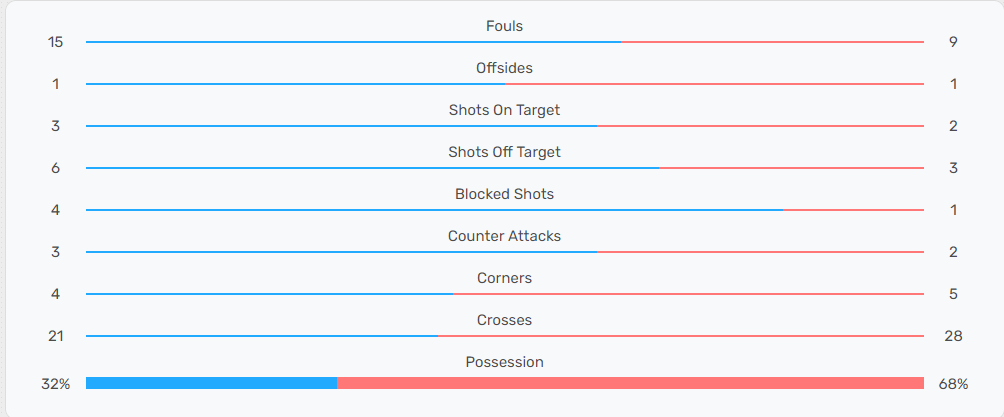

In [14]:
from IPython.display import Image
Image(filename='match_stats.png')

### 1. Fouls

Fouls are separated in 2 categories following the Statsbomb doc : **Fouls commited** and **Fouls won** child nodes of the **Type** column

**id=21, Fouls won :** player wins a free kick or penalty  
**id=22, Fouls commited:** infringement penalised by a referee

We are going to extract the fouls commited by each team

In [15]:
# Fouls committed by Brighton & Hove Albion WFC
c = 0
for i,val in enumerate(events):
    if events[i]['team']['name'] == 'Brighton & Hove Albion WFC':
        if events[i]['type']['name'] == 'Foul Committed':
           c = c+1
        
c

11

#### Exo 3 : Fouls function

In [16]:
def fouls_committed(file, team):
    c = 0
    for i,val in enumerate(file):
        if file[i]['team']['name'] == team:
            if file[i]['type']['name'] == 'Foul Committed':
                c = c+1
        
    return c  

In [17]:
fouls_committed(events,'West Ham United LFC')

17

### 2. Offsides

 2 Types of offsides to differeciante 
 
 **Type>Offside** : following the doc manuel which defines a non pass originated offside  
 **Pass>Pass Offside** : offside originating from a pass
 

In [18]:
# Offsides committed by Brighton & Hove Albion WFC
c = 0
for i,val in enumerate(events):
    if events[i]['team']['name'] == 'Brighton & Hove Albion WFC':
        if 'pass' in events[i].keys():
            if 'outcome' in events[i]['pass'].keys():
                if(events[i]['pass']['outcome']['name'] == 'Pass Offside'):
                    print('BOUM')
                    c = c + 1
c

BOUM
BOUM
BOUM


3

In [19]:
events[0]['type'].keys()

dict_keys(['id', 'name'])

#### Exo 4 : Offsides function

In [20]:
def pass_offsides(file,team):
    c = 0
    for i,val in enumerate(file):
        if file[i]['team']['name'] == team:
            if 'pass' in file[i].keys():
                if 'outcome' in file[i]['pass'].keys():
                    if(file[i]['pass']['outcome']['name'] == 'Pass Offside'):
                        print('BOUM')
                        c = c + 1
                        
    return c

Using the function on the visiting team

In [21]:
print(pass_offsides(events,'West Ham United LFC'))

0


### 3. Shots on target

Following the documentation a **Shot** can be of many outcomes.  
The outcomes are per my analysis divided in 2 categories.  
**<i><u>Off Target</u></i>**
* Off T
* Saved Off T

**<i><u>On Target</u></i>**  
* Goal
* Post
* Blocked
* Saved
* Saved to post  

With the **wayward** attribute that define a totally missed shot that I won't take into consideration

In [22]:
# Getting all the shots events
shots = []
for i,val in enumerate(events):
    if events[i]['type']['name'] == 'Shot':
        shots.append(events[i])

In [23]:
# Retrieving the home team shots on target
c = 0
for i,val in enumerate(shots):
    if shots[i]['team']['name'] == 'Brighton & Hove Albion WFC':
        if (shots[i]['shot']['outcome']['name'] != 'Off T') and (shots[i]['shot']['outcome']['name'] != "Saved Off T") and (shots[i]['shot']['outcome']['name'] != "Wayward"):
            c = c+1
        
c

8

#### Exo 5 : Shots on target function

In [24]:
def shots_on_target(file,team):
    #isolate the shots events
    shots = []
    for i,val in enumerate(file):
        if file[i]['type']['name'] == 'Shot':
            shots.append(events[i])
            
    #Retrieve the shots on target
    c = 0
    for i,val in enumerate(shots):
        if shots[i]['team']['name'] == team:
            if (shots[i]['shot']['outcome']['name'] != 'Off T') and (shots[i]['shot']['outcome']['name'] != "Saved Off T") and (shots[i]['shot']['outcome']['name'] != "Wayward"):
                c = c + 1
                
    return c    

In [25]:
shots_on_target(events,'West Ham United LFC')

7

### 4 . Shots Off target

we can easily infer the shots off target, so we directly go to write the function

In [26]:
def shots_off_target(file,team):
    #isolate the shots events
    shots = []
    for i,val in enumerate(file):
        if file[i]['type']['name'] == 'Shot':
            shots.append(events[i])
            
    #Retrieve the shots on target
    c = 0
    for i,val in enumerate(shots):
        if shots[i]['team']['name'] == team:
            if (shots[i]['shot']['outcome']['name'] == 'Off T') or (shots[i]['shot']['outcome']['name'] == "Saved Off T") :
                c = c + 1
                
    return c    

In [27]:
shots_off_target(events,'West Ham United LFC')

2

### 5 . Counter attack

Number of counter attacks made by the home team

In [36]:
c = 0
for i,val in enumerate(events):
    if events[i]['team']['name'] == 'Brighton & Hove Albion WFC':
        if 'play_pattern' in events[i].keys():
            if events[i]['play_pattern']['name'] == 'From Counter':
                c = c+1
c

27

#### Exo 6 : Counter attacks functions

In [39]:
def counter_attacks(file,team):
    c = 0
    for i,val in enumerate(file):
        if file[i]['team']['name'] == team:
            if 'play_pattern' in file[i].keys():
                if file[i]['play_pattern']['name'] == 'From Counter':
                    c = c+1
    return c   

In [40]:
counter_attacks(events,'West Ham United LFC')

32